<h1>Linear Regression
<h2>The Normal Equation

In [1]:
# SETUP
import sys
import sklearn
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X[:10]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516]])

In [4]:
y[:10]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995],
       [5.29307969],
       [5.82639572],
       [8.67878666],
       [6.79819647],
       [7.74667842]])

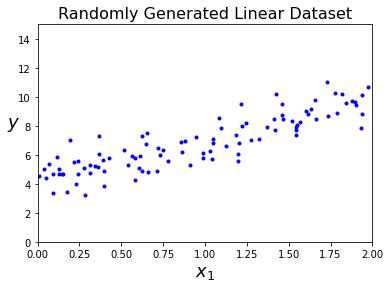

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title('Randomly Generated Linear Dataset', fontsize=16)
plt.show()

In [6]:
# computing 'θ^' using the Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
X_b[:10]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516]])

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # dot() for scalar product

In [8]:
theta_best

array([[4.21509616],
       [2.77011339]])

The exact results bellow are 4 and 3 (y = 4 + 3 * X + np.random.randn(100, 1))

In [9]:
# making predictions using normal eq. result
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 =1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [10]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Plotting model predictions

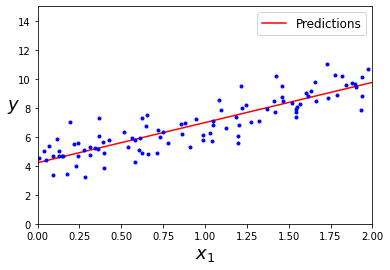

In [11]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(fontsize=12)
plt.axis([0, 2, 0, 15])
plt.show()

<h2> Using Scikit-learn - PseudoInverse - SVD

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # bias and feature weights
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Scikit LinearRegression class is based on the scipy.linalg.lstsq() function, which can be called directly:

In [13]:
theta_best_svd, residual, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes <b>X_+ y</b>, where <b>X_+</b> is the pseudoinverse of <b>X</b> (specifically the Moore-Penrose inverse). np.linalg.pinv() compute the pseudoinverse directly.<br>
Pseudoinverse (Moore-Penrose Inverse) its a method to invert non square matrix

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

<h2>Gradient Descent</h2>

<h3>Batch Gradient Descent

In [15]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization
%time
for iteration in range(n_iterations):
    gradients = 2/m *X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

Wall time: 0 ns


In [16]:
theta

array([[4.21509616],
       [2.77011339]])

In [17]:
X_new_b.dot(theta)
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Gradient Descent with different learning rates

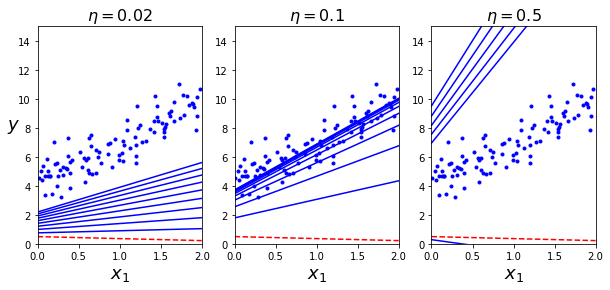

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

<h3>Stochastic Gradient Descent

<i>learning schedule</i> - Function that determines the learning rate at each iteration

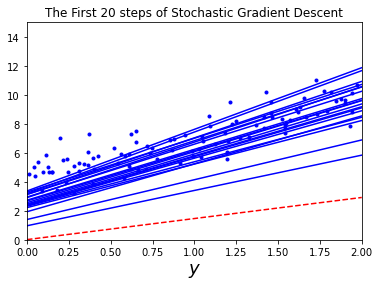

In [19]:
# same function X and y, just to remember:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparams
eta = 0.1 # learning rate
m = len(X_b)


# function that determines the learning rate at each iteration:
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

theta_path_sgd = []


for epoch in range(n_epochs):
    for i in range(m):
        # ploting some points
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)


plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.xlabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title("The First 20 steps of Stochastic Gradient Descent")
plt.show()        

In [20]:
theta

array([[4.19000137],
       [2.73381258]])

Performing Linear Regression with Stochastic GD from Scikit-Learn

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25308539]), array([2.84721086]))

<h3>Mini-batch Gradient Descent

In [23]:
theta_path_mgd = []

n_iterations = 50
mini_batch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, mini_batch_size):
        t += 1
        xi = X_b_shuffled[i:i+mini_batch_size]
        yi = y_shuffled[i:i+mini_batch_size]
        gradients = 2/mini_batch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [24]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [25]:
theta_path_bgd = np.array(theta_path_bgd) #batch gradient descent
theta_path_sgd = np.array(theta_path_sgd) #stochastic gradient descent
theta_path_mgd = np.array(theta_path_mgd) #mini-batch gradient descent

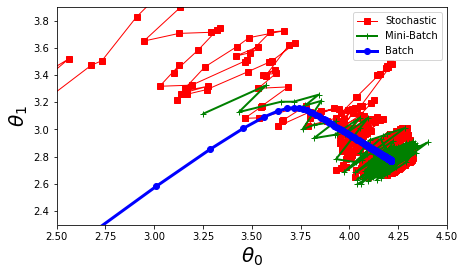

In [26]:
plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-Batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend()
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

<h1>Polynomial Regression

Non-linear data:

In [27]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

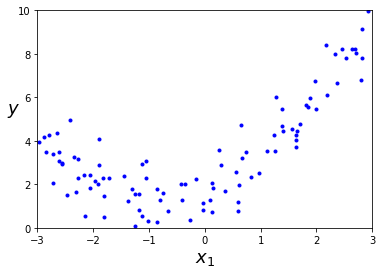

In [28]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([-3, 3, 0, 10])
plt.show()

Scikit-Learn's PolynomialFeatures class - trasform training data adding the square (2nd degree polynomial) of each feature in the training set as a new feature

<b>From Scikit-Learn's documentation</b>:
"Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]."

<i>PolynominalFeatures(degree=d)</i> transforms an array containing $n$ features into an array containing $\frac{(n + d)!}{d!n!}$ features 

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_poly = X[n] and X[n]^2

In [30]:
print("X[0]:", X[0])
print("X_poly[0]:", X_poly[0])

X[0]: [-0.75275929]
X_poly[0]: [-0.75275929  0.56664654]


In [31]:
# fitting LinearRegression model to extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [32]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Original function: $y = 0.5x_1^2 + 1.0x_1 + 2.0 + Gaussian Noise$

Estimated Function: $\hat{y} = 0.56x_1^2 + 0.93x_1 + 1.78$

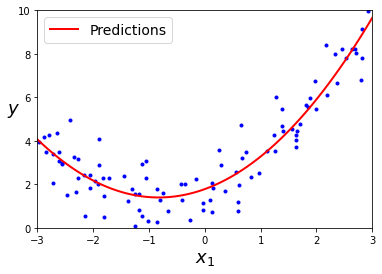

In [33]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1) #100 values equaly distributed between -3 and 3 
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly) # function prediction
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Comparing a linear model, with a quadratic model with a 300-degree polynomial model:

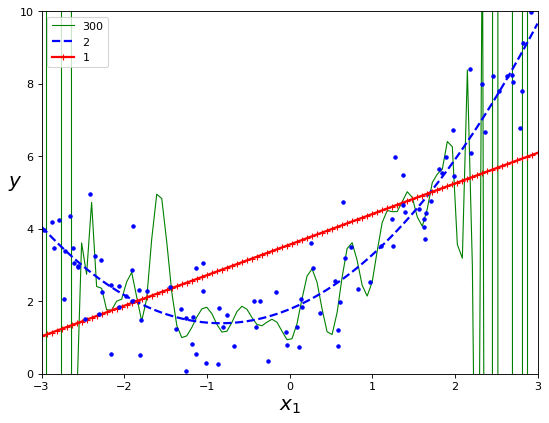

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(8, 6), dpi=80)
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

<h1>Learning Curves

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

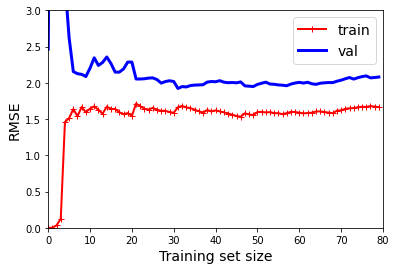

In [36]:
# learning curves of the plain Linear Regression model:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

(0.0, 80.0, 0.0, 3.0)

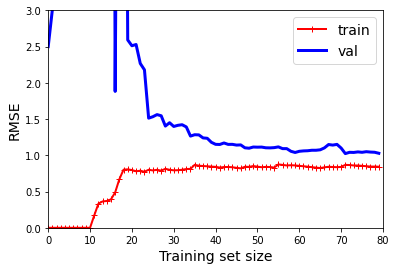

In [39]:
# testing a 10th-degree polynomial model on the same data
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])